In [1]:
from mtpy import MT, MTCollection
from pathlib import Path # Package for location management
import os
import numpy as np

In [2]:
folder_lokasi_edi = "./mtpy_occam_project/DataEdiBaru2"
# Path to the folder with the MT data files.

mtc = MTCollection() 
# Create an empty MTCollection object.

mtc.open_collection(Path().cwd().joinpath(os.path.join(folder_lokasi_edi, "mt_collection.h5")))
# Open the MT data collection from the "mt_collection.h5" file in the specified folder.


This is script is designed to take input files named stat01.edi through stat18.edi 

In [3]:
folder_path = folder_lokasi_edi
# Set folder_path to the path specified in folder_lokasi_edi.

ranges = [(1, 2, 3, 4, 5, 6), (7, 8, 9, 10, 11, 12), (13, 14, 15, 16, 17, 18)]
# Define ranges of station numbers, grouped by profiles.

for profile_id, ranges in enumerate(ranges, start=1):
    # Iterate over profiles and their corresponding station number ranges.

    edi_list = []
    # Initialize an empty list to hold filenames.

    for i in ranges:
        filename = f"stat{i:02}.edi"
        # Create filenames for each station in the current profile.

        edi_list.append(filename)
        # Add the filename to edi_list.

    for fn in edi_list:
        mt_object = MT()
        # Create a new MT object.

        fn = os.path.join(folder_path, fn)
        # Combine folder_path and filename to get the full path.

        mt_object.read(fn)
        # Read the .edi file into the MT object.

        mt_object.survey_metadata.id = f"profile{profile_id}"
        # Set the profile ID in the metadata.

        ##### Replace NaN values with the average value #####
        val = mt_object.Z.z[0][0][0]
        # Get the first impedance value.

        new_val_temp = mt_object.Z.z
        # Create a temporary copy of the impedance values.

        new_val = mt_object.Z.z
        # Create another copy of the impedance values.

        new_val_temp[np.isclose(new_val_temp, val)] = np.nan
        # Replace values close to the first value with NaN in the temp copy.

        new_val[np.isclose(new_val, val)] = np.nanmean(new_val_temp)
        # Replace values close to the first value with the mean of the temp copy.

        mt_object.impedance = new_val
        # Update the MT object impedance with the new values.

        #####################################################

        mtc.add_tf(mt_object)
        # Add the MT object to the MTCollection.

        print(f"{fn} is extracted in profile id: {profile_id}")
        # Print a message indicating the file has been processed.


./mtpy_occam_project/DataEdiBaru2\stat01.edi is extracted in profile id: 1
./mtpy_occam_project/DataEdiBaru2\stat02.edi is extracted in profile id: 1
./mtpy_occam_project/DataEdiBaru2\stat03.edi is extracted in profile id: 1
./mtpy_occam_project/DataEdiBaru2\stat04.edi is extracted in profile id: 1
./mtpy_occam_project/DataEdiBaru2\stat05.edi is extracted in profile id: 1
./mtpy_occam_project/DataEdiBaru2\stat06.edi is extracted in profile id: 1
./mtpy_occam_project/DataEdiBaru2\stat07.edi is extracted in profile id: 2
./mtpy_occam_project/DataEdiBaru2\stat08.edi is extracted in profile id: 2
./mtpy_occam_project/DataEdiBaru2\stat09.edi is extracted in profile id: 2
./mtpy_occam_project/DataEdiBaru2\stat10.edi is extracted in profile id: 2
./mtpy_occam_project/DataEdiBaru2\stat11.edi is extracted in profile id: 2
./mtpy_occam_project/DataEdiBaru2\stat12.edi is extracted in profile id: 2
./mtpy_occam_project/DataEdiBaru2\stat13.edi is extracted in profile id: 3
./mtpy_occam_project/Data

In [4]:
mtc.master_dataframe

,station,survey,latitude,longitude,elevation,tf_id,units,has_impedance,has_tipper,has_covariance,period_min,period_max,hdf5_reference,station_hdf5_reference
0,1,profile1,-7.026121,108.014816,555.00,1,none,True,True,False,0.000002,0.000750,<HDF5 object reference>,<HDF5 object reference>
1,2,profile1,-7.026121,108.014724,551.00,2,none,True,True,False,0.000002,0.000750,<HDF5 object reference>,<HDF5 object reference>
2,3,profile1,-7.026109,108.014612,549.50,3,none,True,True,False,0.000002,0.000750,<HDF5 object reference>,<HDF5 object reference>
3,4,profile1,-7.026100,108.014555,540.75,4,none,True,True,False,0.000002,0.000750,<HDF5 object reference>,<HDF5 object reference>
4,5,profile1,-7.026093,108.014438,539.00,5,none,True,True,False,0.000002,0.000750,<HDF5 object reference>,<HDF5 object reference>
5,6,profile1,-7.026106,108.014358,537.00,6,none,True,True,False,0.000100,0.000750,<HDF5 object reference>,<HDF5 object reference>
6,10,profile2,-7.026396,108.014602,532.00,10,none,True,True,False,0.000002,0.000750,<HDF5 object reference>,<HDF5 object reference>
7,11,profile2,-7.026413,108.014709,532.00,11,none,True,True,False,0.000002,0.000750,<HDF5 object reference>,<HDF5 object reference>
8,12,profile2,-7.026401,108.014793,534.50,12,none,True,True,False,0.000002,0.000750,<HDF5 object reference>,<HDF5 object reference>
9,7,profile2,-7.026379,108.014354,533.00,7,none,True,True,False,0.000056,0.000750,<HDF5 object reference>,<HDF5 object reference>


C:\Users\ASUS\miniconda3\envs\mtpy\lib\site-packages\contextily\tile.py:623: UserWarning: The inferred zoom level of 21 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


24:08:06T17:47:41 | WARNING | line:163 |mtpy.imaging.plot_stations | plot | Could not add base map because Tile URL resulted in a 404 error. Double-check your tile url:
https://basemap.nationalmap.gov/arcgis/rest/services/USGSTopo/MapServer/tile/20/544804/838902


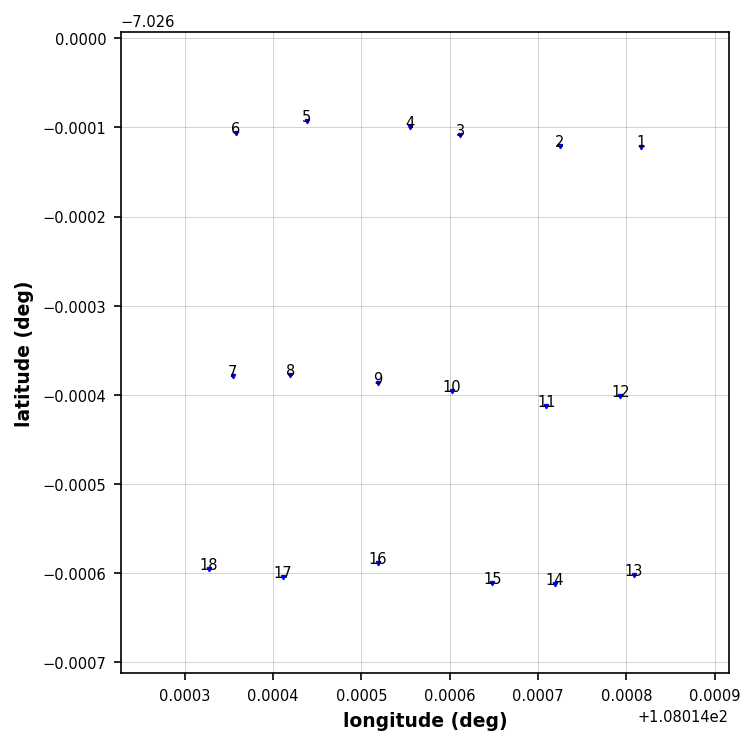

In [5]:
# Load plot station
stations_plot = mtc.plot_stations(pad=.0001)

In [ ]:
# Deviding based on profile

mtc.working_dataframe = mtc.master_dataframe.loc[mtc.master_dataframe.survey == 'profile1']
mtd_profile1 = mtc.to_mt_data()

mtc.working_dataframe = mtc.master_dataframe.loc[mtc.master_dataframe.survey == 'profile2']
mtd_profile2 = mtc.to_mt_data()

mtc.working_dataframe = mtc.master_dataframe.loc[mtc.master_dataframe.survey == 'profile3']
mtd_profile3 = mtc.to_mt_data()

mtc.close_collection()

In [8]:
# Adding CRS code based on location

mtd_profile1.utm_crs = 32748
mtd_profile2.utm_crs = 32748
mtd_profile3.utm_crs = 32748

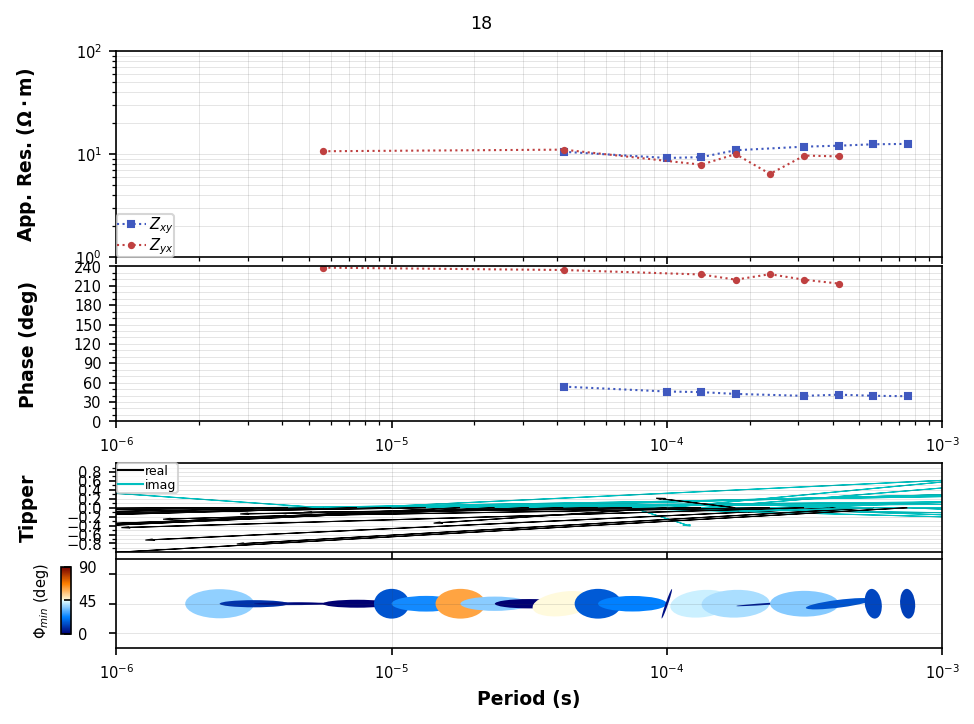

In [9]:
# Plot the Profile 3 Statiun 18
original_profile3 = mtd_profile3.plot_mt_response("profile3.18")

In [10]:
# Performing interpolation

import numpy as np

new_periods = np.logspace(-4,-3, 8)#melakukan interpolasi untuk delapan data
interpolated_mtd_profile1 = mtd_profile1.interpolate(new_periods, inplace=False)
interpolated_mtd_profile3 = mtd_profile3.interpolate(new_periods, inplace=False)
interpolated_mtd_profile2 = mtd_profile2.interpolate(new_periods, inplace=False)

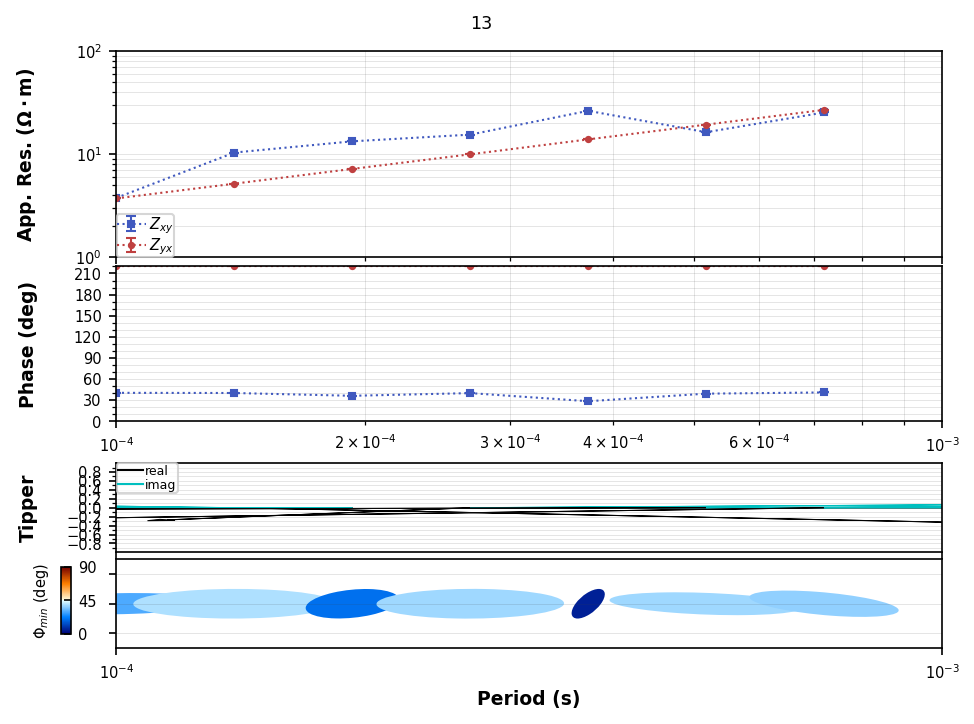

In [11]:
# Plot the interpolation result

interpolate_profile3 = interpolated_mtd_profile3.plot_mt_response("profile3.13")

In [ ]:
# Preparing the Occam Input (Still not Working)

occam2d_object = interpolated_mtd_profile3.to_occam2d_data()

# Set resistivity error
occam2d_object.dataframe["res_xy_model_error"] = (20 / 100) / np.log(10.)
occam2d_object.dataframe["res_yx_model_error"] = (20 / 100) / np.log(10.)

# # Set phase error
occam2d_object.dataframe["phase_xy_model_error"] = (5 / 100.) * 57. / 2.
occam2d_object.dataframe["phase_yx_model_error"] = (2.5 / 100.) * 57. / 2.

occam2d_object.model_mode = '6'

occam2d_object.write_data_file("NewPROFILE3.dat")